# Hypothesis Testing: Statistical Inference for Scientific Decision Making

## Introduction

Hypothesis testing is a fundamental framework in statistical inference that allows us to make decisions about population parameters based on sample data. It provides a rigorous mathematical methodology for evaluating claims and distinguishing signal from noise in experimental data.

## Theoretical Framework

### The Hypothesis Testing Paradigm

A statistical hypothesis is a statement about a population parameter. We formulate two competing hypotheses:

- **Null Hypothesis** ($H_0$): The default assumption, typically representing no effect or no difference
- **Alternative Hypothesis** ($H_1$ or $H_a$): The claim we seek to support with evidence

### Test Statistics and Sampling Distributions

Given a random sample $X_1, X_2, \ldots, X_n$ from a population with mean $\mu$ and variance $\sigma^2$, the sample mean is:

$$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$$

By the Central Limit Theorem, for large $n$:

$$\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$

### The Z-Test Statistic

When the population variance $\sigma^2$ is known, we use the Z-test statistic:

$$Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$$

Under $H_0$, $Z \sim \mathcal{N}(0, 1)$.

### The t-Test Statistic

When $\sigma^2$ is unknown, we estimate it with the sample variance:

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2$$

The t-test statistic is:

$$t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}$$

Under $H_0$, $t \sim t_{n-1}$ (Student's t-distribution with $n-1$ degrees of freedom).

### P-Values and Significance

The **p-value** is the probability of observing a test statistic as extreme as, or more extreme than, the observed value, assuming $H_0$ is true:

$$p = P(|T| \geq |t_{\text{obs}}| \mid H_0)$$

We reject $H_0$ at significance level $\alpha$ if $p < \alpha$.

### Type I and Type II Errors

| Decision | $H_0$ True | $H_0$ False |
|----------|------------|-------------|
| Reject $H_0$ | Type I Error ($\alpha$) | Correct |
| Fail to Reject $H_0$ | Correct | Type II Error ($\beta$) |

The **power** of a test is $1 - \beta$, the probability of correctly rejecting a false null hypothesis.

### Power Function

For a one-sample Z-test with alternative $H_1: \mu = \mu_1$:

$$\text{Power} = 1 - \beta = P\left(Z > z_{\alpha} - \frac{\mu_1 - \mu_0}{\sigma/\sqrt{n}}\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for publication-quality plots
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['legend.fontsize'] = 10

## Demonstration: One-Sample t-Test

We will generate synthetic data to demonstrate hypothesis testing. Suppose we are testing whether a manufacturing process produces items with a target mean weight of $\mu_0 = 100$ grams.

**Hypotheses:**
- $H_0: \mu = 100$
- $H_1: \mu \neq 100$ (two-tailed test)

In [2]:
# Generate sample data (true mean = 102, simulating a slight deviation)
true_mean = 102
true_std = 5
n = 30

sample = np.random.normal(true_mean, true_std, n)

# Calculate sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Using n-1 for unbiased estimate
sample_se = sample_std / np.sqrt(n)

print("Sample Statistics:")
print(f"  Sample size: n = {n}")
print(f"  Sample mean: x̄ = {sample_mean:.3f}")
print(f"  Sample std:  s = {sample_std:.3f}")
print(f"  Standard error: SE = {sample_se:.3f}")

Sample Statistics:
  Sample size: n = 30
  Sample mean: x̄ = 101.059
  Sample std:  s = 4.500
  Standard error: SE = 0.822


In [3]:
# Perform one-sample t-test
mu_0 = 100  # Null hypothesis value
alpha = 0.05

# Calculate t-statistic
t_stat = (sample_mean - mu_0) / sample_se
df = n - 1

# Calculate p-value (two-tailed)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Critical values for two-tailed test
t_critical = t.ppf(1 - alpha/2, df)

print("\nHypothesis Test Results:")
print(f"  Null hypothesis: μ = {mu_0}")
print(f"  t-statistic: t = {t_stat:.4f}")
print(f"  Degrees of freedom: df = {df}")
print(f"  Critical values: ±{t_critical:.4f}")
print(f"  p-value: {p_value:.6f}")
print(f"\nConclusion at α = {alpha}:")

if p_value < alpha:
    print(f"  Reject H₀ (p = {p_value:.4f} < {alpha})")
    print(f"  Evidence suggests μ ≠ {mu_0}")
else:
    print(f"  Fail to reject H₀ (p = {p_value:.4f} ≥ {alpha})")
    print(f"  Insufficient evidence to conclude μ ≠ {mu_0}")


Hypothesis Test Results:
  Null hypothesis: μ = 100
  t-statistic: t = 1.2893
  Degrees of freedom: df = 29
  Critical values: ±2.0452
  p-value: 0.207487

Conclusion at α = 0.05:
  Fail to reject H₀ (p = 0.2075 ≥ 0.05)
  Insufficient evidence to conclude μ ≠ 100


## Confidence Interval Construction

A $(1-\alpha)\%$ confidence interval for $\mu$ is:

$$\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

In [4]:
# Calculate 95% confidence interval
ci_lower = sample_mean - t_critical * sample_se
ci_upper = sample_mean + t_critical * sample_se

print(f"95% Confidence Interval for μ:")
print(f"  [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"\nInterpretation: We are 95% confident that the true mean lies in this interval.")

if ci_lower > mu_0 or ci_upper < mu_0:
    print(f"Note: The null hypothesis value μ₀ = {mu_0} is NOT in the CI, consistent with rejection.")
else:
    print(f"Note: The null hypothesis value μ₀ = {mu_0} IS in the CI, consistent with failure to reject.")

95% Confidence Interval for μ:
  [99.379, 102.740]

Interpretation: We are 95% confident that the true mean lies in this interval.
Note: The null hypothesis value μ₀ = 100 IS in the CI, consistent with failure to reject.


## Statistical Power Analysis

We now examine how the power of the test varies with:
1. Effect size (difference between true and hypothesized mean)
2. Sample size
3. Significance level

In [5]:
def calculate_power(mu_true, mu_0, sigma, n, alpha=0.05):
    """
    Calculate the power of a two-tailed one-sample Z-test.
    
    Parameters:
    -----------
    mu_true : float - True population mean
    mu_0 : float - Null hypothesis mean
    sigma : float - Population standard deviation
    n : int - Sample size
    alpha : float - Significance level
    
    Returns:
    --------
    float : Power of the test
    """
    se = sigma / np.sqrt(n)
    z_crit = norm.ppf(1 - alpha/2)
    
    # Non-centrality parameter
    ncp = (mu_true - mu_0) / se
    
    # Power = P(reject H0 | H1 true)
    power = 1 - norm.cdf(z_crit - ncp) + norm.cdf(-z_crit - ncp)
    
    return power

# Verify power calculation
test_power = calculate_power(mu_true=102, mu_0=100, sigma=5, n=30, alpha=0.05)
print(f"Power for detecting μ=102 vs μ₀=100 (σ=5, n=30, α=0.05): {test_power:.4f}")

Power for detecting μ=102 vs μ₀=100 (σ=5, n=30, α=0.05): 0.5913


## Comprehensive Visualization

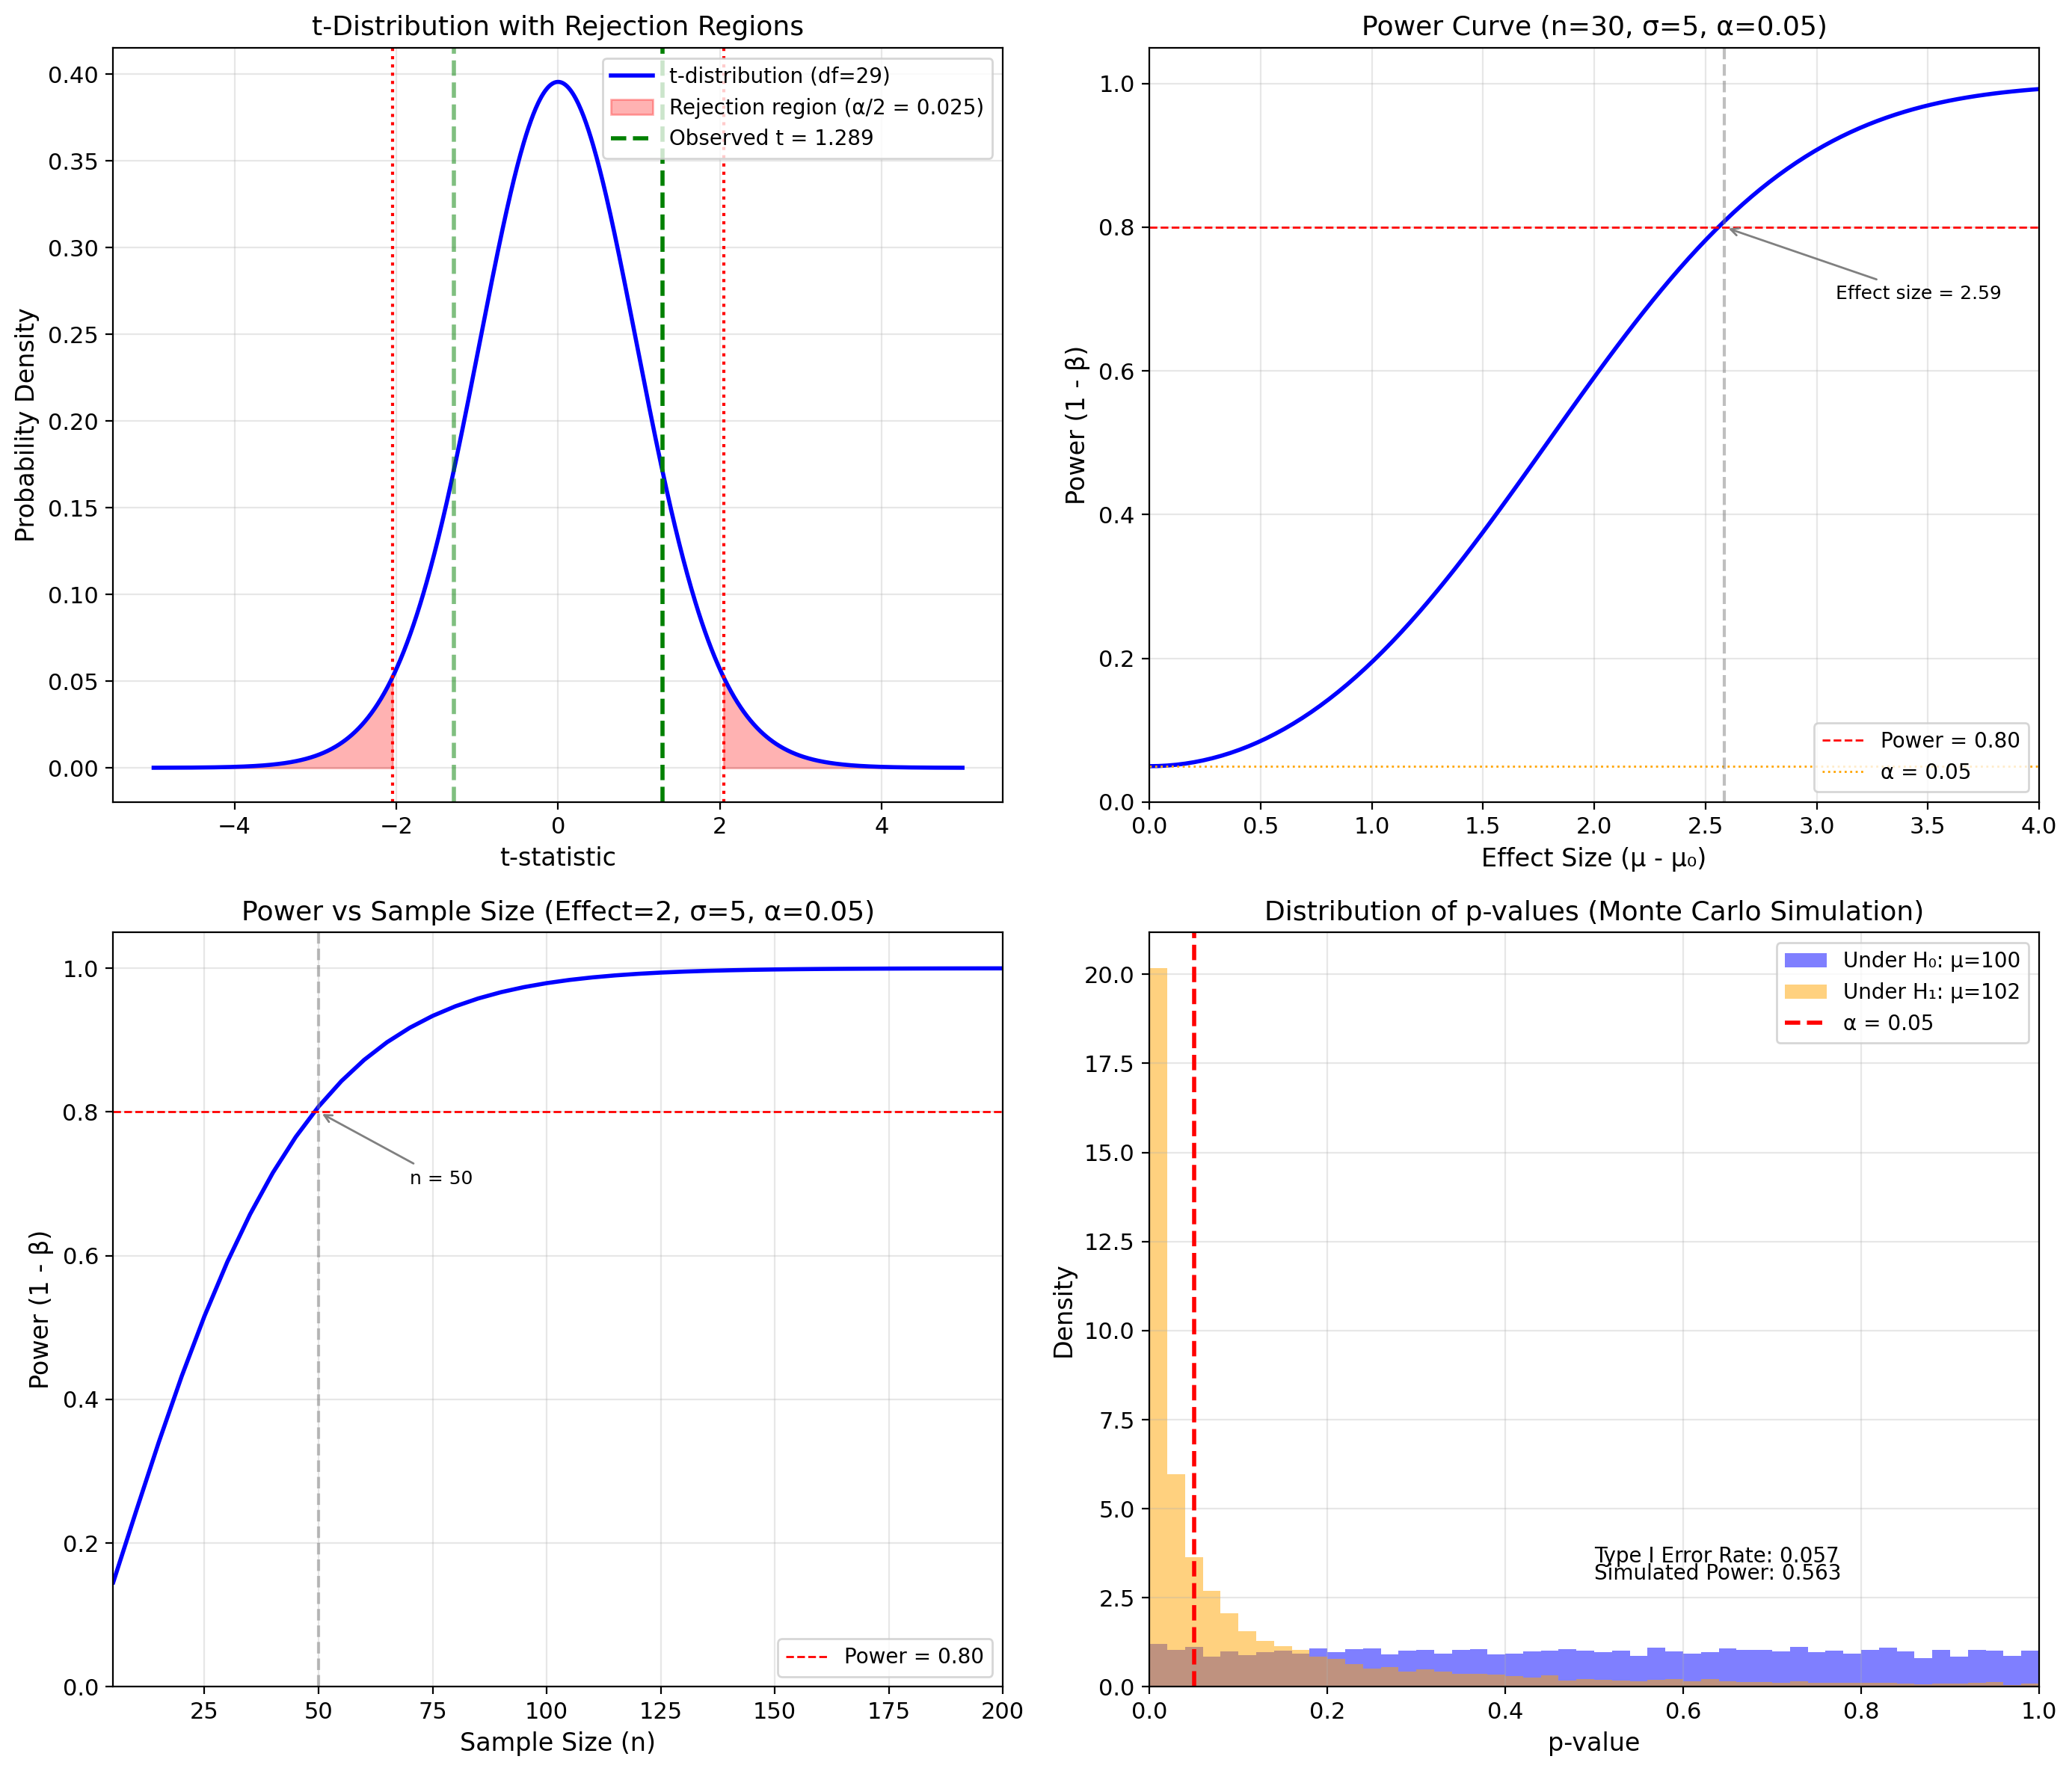


Figure saved to 'plot.png'


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ============================================
# Plot 1: t-Distribution with Rejection Regions
# ============================================
ax1 = axes[0, 0]

x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df)

ax1.plot(x, y, 'b-', linewidth=2, label=f't-distribution (df={df})')
ax1.fill_between(x, y, where=(x <= -t_critical), alpha=0.3, color='red', 
                  label=f'Rejection region (α/2 = {alpha/2})')
ax1.fill_between(x, y, where=(x >= t_critical), alpha=0.3, color='red')

# Mark the observed t-statistic
ax1.axvline(t_stat, color='green', linestyle='--', linewidth=2, 
            label=f'Observed t = {t_stat:.3f}')
ax1.axvline(-t_stat, color='green', linestyle='--', linewidth=2, alpha=0.5)

ax1.axvline(t_critical, color='red', linestyle=':', linewidth=1.5)
ax1.axvline(-t_critical, color='red', linestyle=':', linewidth=1.5)

ax1.set_xlabel('t-statistic')
ax1.set_ylabel('Probability Density')
ax1.set_title('t-Distribution with Rejection Regions')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# ============================================
# Plot 2: Power vs Effect Size
# ============================================
ax2 = axes[0, 1]

effect_sizes = np.linspace(0, 4, 100)  # In terms of (mu_true - mu_0)
powers = [calculate_power(mu_0 + es, mu_0, true_std, n, alpha) for es in effect_sizes]

ax2.plot(effect_sizes, powers, 'b-', linewidth=2)
ax2.axhline(0.8, color='red', linestyle='--', linewidth=1, label='Power = 0.80')
ax2.axhline(alpha, color='orange', linestyle=':', linewidth=1, label=f'α = {alpha}')

# Find effect size for 80% power
for i, p in enumerate(powers):
    if p >= 0.8:
        es_80 = effect_sizes[i]
        ax2.axvline(es_80, color='gray', linestyle='--', alpha=0.5)
        ax2.annotate(f'Effect size = {es_80:.2f}', xy=(es_80, 0.8), 
                     xytext=(es_80+0.5, 0.7), fontsize=9,
                     arrowprops=dict(arrowstyle='->', color='gray'))
        break

ax2.set_xlabel('Effect Size (μ - μ₀)')
ax2.set_ylabel('Power (1 - β)')
ax2.set_title(f'Power Curve (n={n}, σ={true_std}, α={alpha})')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 1.05)

# ============================================
# Plot 3: Power vs Sample Size
# ============================================
ax3 = axes[1, 0]

sample_sizes = np.arange(5, 201, 5)
effect = 2  # Fixed effect size of 2

powers_by_n = [calculate_power(mu_0 + effect, mu_0, true_std, n_i, alpha) 
               for n_i in sample_sizes]

ax3.plot(sample_sizes, powers_by_n, 'b-', linewidth=2)
ax3.axhline(0.8, color='red', linestyle='--', linewidth=1, label='Power = 0.80')

# Find sample size for 80% power
for i, p in enumerate(powers_by_n):
    if p >= 0.8:
        n_80 = sample_sizes[i]
        ax3.axvline(n_80, color='gray', linestyle='--', alpha=0.5)
        ax3.annotate(f'n = {n_80}', xy=(n_80, 0.8), 
                     xytext=(n_80+20, 0.7), fontsize=9,
                     arrowprops=dict(arrowstyle='->', color='gray'))
        break

ax3.set_xlabel('Sample Size (n)')
ax3.set_ylabel('Power (1 - β)')
ax3.set_title(f'Power vs Sample Size (Effect={effect}, σ={true_std}, α={alpha})')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(5, 200)
ax3.set_ylim(0, 1.05)

# ============================================
# Plot 4: P-value Distribution Under H0 and H1
# ============================================
ax4 = axes[1, 1]

# Simulate p-values under null and alternative
n_simulations = 10000
p_values_h0 = []
p_values_h1 = []

for _ in range(n_simulations):
    # Under H0: sample from N(mu_0, sigma)
    sample_h0 = np.random.normal(mu_0, true_std, n)
    t_h0 = (np.mean(sample_h0) - mu_0) / (np.std(sample_h0, ddof=1) / np.sqrt(n))
    p_values_h0.append(2 * (1 - t.cdf(abs(t_h0), df)))
    
    # Under H1: sample from N(mu_0 + 2, sigma)
    sample_h1 = np.random.normal(mu_0 + 2, true_std, n)
    t_h1 = (np.mean(sample_h1) - mu_0) / (np.std(sample_h1, ddof=1) / np.sqrt(n))
    p_values_h1.append(2 * (1 - t.cdf(abs(t_h1), df)))

bins = np.linspace(0, 1, 51)
ax4.hist(p_values_h0, bins=bins, alpha=0.5, density=True, 
         label=f'Under H₀: μ={mu_0}', color='blue')
ax4.hist(p_values_h1, bins=bins, alpha=0.5, density=True, 
         label=f'Under H₁: μ={mu_0+2}', color='orange')

ax4.axvline(alpha, color='red', linestyle='--', linewidth=2, 
            label=f'α = {alpha}')

# Calculate rejection rates
type1_rate = np.mean(np.array(p_values_h0) < alpha)
power_sim = np.mean(np.array(p_values_h1) < alpha)

ax4.text(0.5, 3.5, f'Type I Error Rate: {type1_rate:.3f}', fontsize=10)
ax4.text(0.5, 3.0, f'Simulated Power: {power_sim:.3f}', fontsize=10)

ax4.set_xlabel('p-value')
ax4.set_ylabel('Density')
ax4.set_title('Distribution of p-values (Monte Carlo Simulation)')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('hypothesis_testing_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Two-Sample t-Test: Comparing Two Groups

We now demonstrate the independent two-sample t-test for comparing means of two populations.

### Welch's t-Test

For samples $X_1, \ldots, X_{n_1}$ from population 1 and $Y_1, \ldots, Y_{n_2}$ from population 2:

$$t = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_X^2}{n_1} + \frac{s_Y^2}{n_2}}}$$

With degrees of freedom approximated by the Welch-Satterthwaite equation:

$$\nu \approx \frac{\left(\frac{s_X^2}{n_1} + \frac{s_Y^2}{n_2}\right)^2}{\frac{s_X^4}{n_1^2(n_1-1)} + \frac{s_Y^4}{n_2^2(n_2-1)}}$$

In [7]:
# Generate two samples with different means
np.random.seed(123)

# Group 1: Control
n1, mu1, sigma1 = 35, 50, 8
group1 = np.random.normal(mu1, sigma1, n1)

# Group 2: Treatment
n2, mu2, sigma2 = 40, 55, 10
group2 = np.random.normal(mu2, sigma2, n2)

# Perform Welch's t-test
t_stat_2, p_value_2 = stats.ttest_ind(group1, group2, equal_var=False)

print("Two-Sample Welch's t-Test Results:")
print(f"\nGroup 1 (Control):  n={n1}, x̄={np.mean(group1):.3f}, s={np.std(group1, ddof=1):.3f}")
print(f"Group 2 (Treatment): n={n2}, x̄={np.mean(group2):.3f}, s={np.std(group2, ddof=1):.3f}")
print(f"\nMean difference: {np.mean(group2) - np.mean(group1):.3f}")
print(f"t-statistic: {t_stat_2:.4f}")
print(f"p-value: {p_value_2:.6f}")

if p_value_2 < 0.05:
    print("\nConclusion: Significant difference between groups (p < 0.05)")
else:
    print("\nConclusion: No significant difference between groups (p ≥ 0.05)")

Two-Sample Welch's t-Test Results:

Group 1 (Control):  n=35, x̄=49.256, s=9.990
Group 2 (Treatment): n=40, x̄=56.618, s=10.917

Mean difference: 7.362
t-statistic: -3.0487
p-value: 0.003202

Conclusion: Significant difference between groups (p < 0.05)


## Effect Size: Cohen's d

Cohen's d provides a standardized measure of effect size:

$$d = \frac{\bar{X}_1 - \bar{X}_2}{s_p}$$

where $s_p$ is the pooled standard deviation:

$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

**Interpretation guidelines:**
- $|d| < 0.2$: Negligible
- $0.2 \leq |d| < 0.5$: Small
- $0.5 \leq |d| < 0.8$: Medium
- $|d| \geq 0.8$: Large

In [8]:
def cohens_d(x, y):
    """Calculate Cohen's d for two independent samples."""
    nx, ny = len(x), len(y)
    var_x, var_y = np.var(x, ddof=1), np.var(y, ddof=1)
    
    # Pooled standard deviation
    s_pooled = np.sqrt(((nx-1)*var_x + (ny-1)*var_y) / (nx + ny - 2))
    
    return (np.mean(x) - np.mean(y)) / s_pooled

d = cohens_d(group2, group1)
print(f"Cohen's d = {d:.3f}")

if abs(d) < 0.2:
    interpretation = "negligible"
elif abs(d) < 0.5:
    interpretation = "small"
elif abs(d) < 0.8:
    interpretation = "medium"
else:
    interpretation = "large"
    
print(f"Effect size interpretation: {interpretation}")

Cohen's d = 0.701
Effect size interpretation: medium


## Summary

This notebook demonstrated the fundamental concepts of hypothesis testing:

1. **Formulation**: Setting up null and alternative hypotheses
2. **Test Statistics**: Computing t-statistics and their distributions
3. **Decision Making**: Using p-values and critical values
4. **Confidence Intervals**: Constructing intervals consistent with hypothesis tests
5. **Power Analysis**: Understanding Type I/II errors and sample size planning
6. **Effect Sizes**: Quantifying practical significance with Cohen's d

The visualizations show:
- Rejection regions in the t-distribution
- Power curves as functions of effect size and sample size
- Distribution of p-values under null and alternative hypotheses

Understanding these concepts is essential for proper statistical inference in scientific research.